In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import LinAlgError
from scipy.stats import pearsonr, spearmanr
import csv
import mne

from fooof import FOOOF, FOOOFGroup
from fooof.analysis import *
from fooof.synth import *
from fooof.data import FOOOFResults
from fooof.funcs import average_fg
from fooof.bands import Bands

from ratios import *

In [122]:
def nan_corr_p(vec1, vec2):
    """Correlation of two vectors with NaN values.
    Note: assumes the vectors have NaN in the same indices.
    """
    vec1 = np.asarray(vec1)
    vec2 = np.asarray(vec2)
    nan_inds = np.isnan(vec1)

    return pearsonr(vec1[~nan_inds], vec2[~nan_inds])

def nan_corr_s(vec1, vec2):
    """Correlation of two vectors with NaN values.
    Note: assumes the vectors have NaN in the same indices.
    """
    
    vec1 = np.asarray(vec1)
    vec2 = np.asarray(vec2)

    nan_inds = np.isnan(vec1)

    return spearmanr(vec1[~nan_inds], vec2[~nan_inds])

In [6]:
# Open CSV
data = pd.read_csv("../dat/MIPDB_PublicFile.csv")

In [7]:
# Read in list of channel names that are kept in reduced 111 montage
with open('../dat/chans111.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    ch_labels = list(reader)[0]
    
# Read montage, reduced to 111 channel selection
montage = mne.channels.read_montage('GSN-HydroCel-129', ch_names=ch_labels)

In [8]:
# Define a channel cluster of interest
ch_cluster_parietal = ['E71', 'E76', 'E70', 'E75', 'E83']
ch_cluster_central = ['E7','E106', 'E31', 'Cz', 'E80']
ch_cluster_frontal = ['E15', 'E18', 'E16', 'E10', 'E11']

# Get the indices of the channels of interest
ch_inds_parietal = mne.pick_channels(montage.ch_names, ch_cluster_parietal)
ch_inds_central = mne.pick_channels(montage.ch_names, ch_cluster_central)
ch_inds_frontal = mne.pick_channels(montage.ch_names, ch_cluster_frontal)

In [9]:
def get_real_params(df, chs, age=[0,100]):


    age_range = df[(df['Age'] >= age[0]) & (df['Age'] <= age[1])]
    age_range_ids = age_range.ID.values
    #Open Eyes closed data for all IDs
    problem_files = []
    missing_files = []
    peaks = []
    apcs = []
    tb_ratios = []
    ages = []
    for filename in age_range_ids:
        try:
            # Construct FOOOFGroup model on psd
            curr = np.load('../dat/psds/'+ filename + '_ec_psds.npz')
            freqs = curr['arr_0']
            for ch in chs:

                ps = curr['arr_1'][0][ch]
                fm = FOOOF(verbose=False)
                fm.add_data(freqs, ps)
                fm.fit()

                # Following ratio is only for one block
                curr_ratio = calc_band_ratio(freqs, ps, THETA_BAND, BETA_BAND)
                tb_ratios.append(curr_ratio)

                # Append params to respective array
                apcs.append(fm.aperiodic_params_[1])
                peaks.append(fm.peak_params_)

                curr_age = data[data['ID'] ==filename].Age.values[0]
                ages.append(curr_age)
        except FileNotFoundError:
            missing_files.append(filename)
        except ValueError:
            problem_files.append(filename)
        except LinAlgError:
            problem_files.append(filename)

    return [tb_ratios, apcs, peaks, ages], [problem_files, missing_files]

In [184]:
all_age_central[1][0]

NameError: name 'all_age_central' is not defined

In [82]:
def get_real_fg(df, chs, age=[0,100]):
    age_range = df[(df['Age'] >= age[0]) & (df['Age'] <= age[1])]
    age_range_ids = age_range.ID.values
    #Open Eyes closed data for all IDs
    problem_files = []
    missing_files = []
    peaks = []
    apcs = []
    tb_ratios = []
    powers = []
    fgs = []
    for filename in age_range_ids:
        try:
            # Construct FOOOFGroup model on psd
            curr = np.load('../dat/psds/'+ filename + '_ec_psds.npz')
            freqs = curr['arr_0']


            ps = curr['arr_1'][0][chs]
            fg = FOOOFGroup(verbose=False)
    
            #ps = np.array(powers)

            fg.add_data(freqs, ps)
            fg.fit()
            curr_fm = average_fg(fg,bands)
            fgs.append(curr_fm)
            
            # Following ratio is only for one block
            curr_ratio = calc_band_ratio(freqs, np.mean(ps, axis=0), THETA_BAND, BETA_BAND)
            tb_ratios.append(curr_ratio)


        except FileNotFoundError:
            missing_files.append(filename)
        except ValueError:
            problem_files.append(filename)
        except LinAlgError:
            problem_files.append(filename)
        except IndexError:
            problem_files.append(filename)

    
    return fgs, tb_ratios

In [83]:
#all_age_parietal = get_real_params(data, ch_inds_parietal)
#all_age_central = get_real_params(data, ch_inds_central)
all_age_frontal = get_real_params(data, ch_inds_frontal)

all_age_parietal_fg = get_real_fg(data, ch_inds_parietal)
all_age_central_fg = get_real_fg(data, ch_inds_central)
all_age_frontal_fg = get_real_fg(data, ch_inds_frontal)

C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, 

C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, 

C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:45: RuntimeWarning: Mean of empty slice
  for label, band in bands])
C:\Users\julio\Anaconda3\lib\site-packages\fooof\funcs.py:47: RuntimeWarning: Mean of empty slice
  for label, 

In [106]:
all_age_parietal_fg[0][0].peak_params_[0]

theta_cf_parietal = []
beta_cf_parietal = []
theta_amp_parietal = []
beta_amp_parietal = []
theta_bw_parietal = []
beta_bw_parietal = []

theta_cf_central = []
beta_cf_central = []
theta_amp_central = []
beta_amp_central = []
theta_bw_central = []
beta_bw_central = []

theta_cf_frontal = []
beta_cf_frontal = []
theta_amp_frontal = []
beta_amp_frontal = []
theta_bw_frontal = []
beta_bw_frontal = []

for ind, vale in enumerate(all_age_parietal_fg[0]):
    theta_cf_parietal.append(all_age_parietal_fg[0][ind].peak_params_[0][0])
    beta_cf_parietal.append(all_age_parietal_fg[0][ind].peak_params_[1][0])
    theta_amp_parietal.append(all_age_parietal_fg[0][ind].peak_params_[0][1])
    beta_amp_parietal.append(all_age_parietal_fg[0][ind].peak_params_[1][1])
    theta_bw_parietal.append(all_age_parietal_fg[0][ind].peak_params_[0][2])
    beta_bw_parietal.append(all_age_parietal_fg[0][ind].peak_params_[1][2])
    
    theta_cf_central.append(all_age_central_fg[0][ind].peak_params_[0][0])
    beta_cf_central.append(all_age_central_fg[0][ind].peak_params_[1][0])
    theta_amp_central.append(all_age_central_fg[0][ind].peak_params_[0][1])
    beta_amp_central.append(all_age_central_fg[0][ind].peak_params_[1][1])
    theta_bw_central.append(all_age_central_fg[0][ind].peak_params_[0][2])
    beta_bw_central.append(all_age_central_fg[0][ind].peak_params_[1][2])
    
    theta_cf_frontal.append(all_age_frontal_fg[0][ind].peak_params_[0][0])
    beta_cf_frontal.append(all_age_frontal_fg[0][ind].peak_params_[1][0])
    theta_amp_frontal.append(all_age_frontal_fg[0][ind].peak_params_[0][1])
    beta_amp_frontal.append(all_age_frontal_fg[0][ind].peak_params_[1][1])
    theta_bw_frontal.append(all_age_frontal_fg[0][ind].peak_params_[0][2])
    beta_bw_frontal.append(all_age_frontal_fg[0][ind].peak_params_[1][2])
avg_tb_ratios = all_age_parietal_fg[1]

In [123]:
bands = Bands({'theta' : [4, 8], 'beta' : [20, 30]})

# Theta CF Parietal
parietal_t_cf_pear = nan_corr_p(theta_cf_parietal, avg_tb_ratios)
parietal_t_cf_spear = nan_corr_s(theta_cf_parietal, avg_tb_ratios)

# Beta CF Parietal
parietal_b_cf_pear = nan_corr_p(beta_cf_parietal, avg_tb_ratios)
parietal_b_cf_spear = nan_corr_s(beta_cf_parietal, avg_tb_ratios)

#Theta amp parietal
parietal_t_amp_pear = nan_corr_p(theta_amp_parietal, avg_tb_ratios)
parietal_t_amp_spear = nan_corr_s(theta_amp_parietal, avg_tb_ratios)

# beta amp parietal
parietal_b_amp_pear = nan_corr_p(beta_amp_parietal, avg_tb_ratios)
parietal_b_amp_spear = nan_corr_s(beta_amp_parietal, avg_tb_ratios)

#theta bw parietal
parietal_t_bw_pear = nan_corr_p(theta_bw_parietal, avg_tb_ratios)
parietal_t_bw_spear = nan_corr_s(theta_bw_parietal, avg_tb_ratios)

#beta bw parietal
parietal_b_bw_pear = nan_corr_p(beta_bw_parietal, avg_tb_ratios)
parietal_b_bw_spear = nan_corr_s(beta_bw_parietal, avg_tb_ratios)

################################################

# Theta CF central
central_t_cf_pear = nan_corr_p(theta_cf_central, avg_tb_ratios)
central_t_cf_spear = nan_corr_s(theta_cf_central, avg_tb_ratios)

# Beta CF Parietal
central_b_cf_pear = nan_corr_p(beta_cf_central, avg_tb_ratios)
central_b_cf_spear = nan_corr_s(beta_cf_central, avg_tb_ratios)

#Theta amp parietal
central_t_amp_pear = nan_corr_p(theta_amp_central, avg_tb_ratios)
central_t_amp_spear = nan_corr_s(theta_amp_central, avg_tb_ratios)

# beta amp parietal
central_b_amp_pear = nan_corr_p(beta_amp_central, avg_tb_ratios)
central_b_amp_spear = nan_corr_s(beta_amp_central, avg_tb_ratios)

#theta bw parietal
central_t_bw_pear = nan_corr_p(theta_bw_central, avg_tb_ratios)
central_t_bw_spear = nan_corr_s(theta_bw_central, avg_tb_ratios)

#beta bw parietal
central_b_bw_pear = nan_corr_p(beta_bw_central, avg_tb_ratios)
central_b_bw_spear = nan_corr_s(beta_bw_central, avg_tb_ratios)

################################################
# Theta CF central
frontal_t_cf_pear = nan_corr_p(theta_cf_frontal, avg_tb_ratios)
frontal_t_cf_spear = nan_corr_s(theta_cf_frontal, avg_tb_ratios)

# Beta CF Parietal
frontal_b_cf_pear = nan_corr_p(beta_cf_frontal, avg_tb_ratios)
frontal_b_cf_spear = nan_corr_s(beta_cf_frontal, avg_tb_ratios)

#Theta amp parietal
frontal_t_amp_pear = nan_corr_p(theta_amp_frontal, avg_tb_ratios)
frontal_t_amp_spear = nan_corr_s(theta_amp_frontal, avg_tb_ratios)

# beta amp parietal
frontal_b_amp_pear = nan_corr_p(beta_amp_frontal, avg_tb_ratios)
frontal_b_amp_spear = nan_corr_s(beta_amp_frontal, avg_tb_ratios)

#theta bw parietal
frontal_t_bw_pear = nan_corr_p(theta_bw_frontal, avg_tb_ratios)
frontal_t_bw_spear = nan_corr_s(theta_bw_frontal, avg_tb_ratios)

#beta bw parietal
frontal_b_bw_pear = nan_corr_p(beta_bw_frontal, avg_tb_ratios)
frontal_b_bw_spear = nan_corr_s(beta_bw_frontal, avg_tb_ratios)


#all_age_central_fg
#all_age_frontal_fg

In [124]:
print("parietal theta cf pearson: " ,parietal_t_cf_pear)
print("parietal theta cf spearman: " ,parietal_t_cf_spear)
print()
print("parietal theta amp pearson: " ,parietal_t_amp_pear)
print("parietal theta amp spearman: " ,parietal_t_amp_spear)
print()
print("parietal theta bw pearson: " ,parietal_t_bw_pear)
print("parietal theta bw spearman: " ,parietal_t_bw_spear)
print()
print("parietal theta cf pearson: " ,parietal_t_cf_pear)
print("parietal theta cf spearman: " ,parietal_t_cf_spear)
print()
print("parietal theta amp pearson: " ,parietal_t_amp_pear)
print("parietal theta amp spearman: " ,parietal_t_amp_spear)
print()
print("parietal theta bw pearson: " ,parietal_t_bw_pear)
print("parietal theta bw spearman: " ,parietal_t_bw_spear)
print()
################

print("parietal beta cf pearson: " ,parietal_b_cf_pear)
print("parietal beta cf spearman: " ,parietal_b_cf_spear)
print()
print("parietal beta amp pearson: " ,parietal_b_amp_pear)
print("parietal beta amp spearman: " ,parietal_b_amp_spear)
print()
print("parietal beta bw pearson: " ,parietal_b_bw_pear)
print("parietal beta bw spearman: " ,parietal_b_bw_spear)
print()
print("parietal beta cf pearson: " ,parietal_b_cf_pear)
print("parietal beta cf spearman: " ,parietal_b_cf_spear)
print()
print("parietal beta amp pearson: " ,parietal_b_amp_pear)
print("parietal beta amp spearman: " ,parietal_b_amp_spear)
print()
print("parietal beta bw pearson: " ,parietal_b_bw_pear)
print("parietal beta bw spearman: " ,parietal_b_bw_spear)
print()
##############

print("central theta cf pearson: " ,central_t_cf_pear)
print("central theta cf spearman: " ,central_t_cf_spear)
print()
print("central theta amp pearson: " ,central_t_amp_pear)
print("central theta amp spearman: " ,central_t_amp_spear)
print()
print("central theta bw pearson: " ,central_t_bw_pear)
print("central theta bw spearman: " ,central_t_bw_spear)
print()
print("central theta cf pearson: " ,central_t_cf_pear)
print("central theta cf spearman: " ,central_t_cf_spear)
print()
print("central theta amp pearson: " ,central_t_amp_pear)
print("central theta amp spearman: " ,central_t_amp_spear)
print()
print("central theta bw pearson: " ,central_t_bw_pear)
print("central theta bw spearman: " ,central_t_bw_spear)
print()
################

print("central beta cf pearson: " ,central_b_cf_pear)
print("central beta cf spearman: " ,central_b_cf_spear)
print()
print("central beta amp pearson: " ,central_b_amp_pear)
print("central beta amp spearman: " ,central_b_amp_spear)
print()
print("central beta bw pearson: " ,central_b_bw_pear)
print("central beta bw spearman: " ,central_b_bw_spear)
print()
print("central beta cf pearson: " ,central_b_cf_pear)
print("central beta cf spearman: " ,central_b_cf_spear)
print()
print("central beta amp pearson: " ,central_b_amp_pear)
print("central beta amp spearman: " ,central_b_amp_spear)
print()
print("central beta bw pearson: " ,central_b_bw_pear)
print("central beta bw spearman: " ,central_b_bw_spear)
print()

print("frontal theta cf pearson: " ,central_t_cf_pear)
print("frontal theta cf spearman: " ,frontal_t_cf_spear)
print()
print("frontal theta amp pearson: " ,frontal_t_amp_pear)
print("frontal theta amp spearman: " ,frontal_t_amp_spear)
print()
print("frontal theta bw pearson: " ,frontal_t_bw_pear)
print("frontal theta bw spearman: " ,frontal_t_bw_spear)
print()
print("frontal theta cf pearson: " ,frontal_t_cf_pear)
print("frontal theta cf spearman: " ,frontal_t_cf_spear)
print()
print("frontal theta amp pearson: " ,frontal_t_amp_pear)
print("frontal theta amp spearman: " ,frontal_t_amp_spear)
print()
print("frontal theta bw pearson: " ,frontal_t_bw_pear)
print("frontal theta bw spearman: " ,frontal_t_bw_spear)
print()
################

print("frontal beta cf pearson: " ,frontal_b_cf_pear)
print("frontal beta cf spearman: " ,frontal_b_cf_spear)
print()
print("frontal beta amp pearson: " ,frontal_b_amp_pear)
print("frontal beta amp spearman: " ,frontal_b_amp_spear)
print()
print("frontal beta bw pearson: " ,frontal_b_bw_pear)
print("frontal beta bw spearman: " ,frontal_b_bw_spear)
print()
print("frontal beta cf pearson: " ,frontal_b_cf_pear)
print("frontal beta cf spearman: " ,frontal_b_cf_spear)
print()
print("frontal beta amp pearson: " ,frontal_b_amp_pear)
print("frontal beta amp spearman: " ,frontal_b_amp_spear)
print()
print("frontal beta bw pearson: " ,frontal_b_bw_pear)
print("frontal beta bw spearman: " ,frontal_b_bw_spear)

parietal theta cf pearson:  (0.1164750145597856, 0.3673042005466911)
parietal theta cf spearman:  SpearmanrResult(correlation=0.07798846667170305, pvalue=0.5468390986883829)

parietal theta amp pearson:  (0.4678500411699087, 0.00012595190881056165)
parietal theta amp spearman:  SpearmanrResult(correlation=0.3670267684017023, pvalue=0.003342907852875489)

parietal theta bw pearson:  (0.3332436593670687, 0.008128627726976546)
parietal theta bw spearman:  SpearmanrResult(correlation=0.23897961498224032, pvalue=0.06139539811986054)

parietal theta cf pearson:  (0.1164750145597856, 0.3673042005466911)
parietal theta cf spearman:  SpearmanrResult(correlation=0.07798846667170305, pvalue=0.5468390986883829)

parietal theta amp pearson:  (0.4678500411699087, 0.00012595190881056165)
parietal theta amp spearman:  SpearmanrResult(correlation=0.3670267684017023, pvalue=0.003342907852875489)

parietal theta bw pearson:  (0.3332436593670687, 0.008128627726976546)
parietal theta bw spearman:  Spearman

In [140]:
print("central theta cf spearman: " ,central_t_cf_spear)
print("central theta amp spearman: " ,central_t_amp_spear)
print("central theta bw spearman: " ,central_t_bw_spear)

print("central beta cf spearman: " ,central_b_cf_spear)
print("central beta amp spearman: " ,central_b_amp_spear)
print("central beta bw spearman: " ,central_b_bw_spear)
theta_data = [central_t_cf_spear[0],central_t_amp_spear[0], central_t_bw_spear[0]]
beta_data = [central_b_cf_spear[0],central_b_amp_spear[0], central_b_bw_spear[0]]
heats = np.array([theta_data, beta_data])

central theta cf spearman:  SpearmanrResult(correlation=-0.0002908483921142149, pvalue=0.9979835636736129)
central theta amp spearman:  SpearmanrResult(correlation=0.2869409071940717, pvalue=0.010862745523717)
central theta bw spearman:  SpearmanrResult(correlation=0.25806904209266446, pvalue=0.022536902721927647)
central beta cf spearman:  SpearmanrResult(correlation=0.03506995581737849, pvalue=0.7330837766115756)
central beta amp spearman:  SpearmanrResult(correlation=-0.27132863454660217, pvalue=0.0071825001951504736)
central beta bw spearman:  SpearmanrResult(correlation=-0.1242837559303342, pvalue=0.22517042716138022)


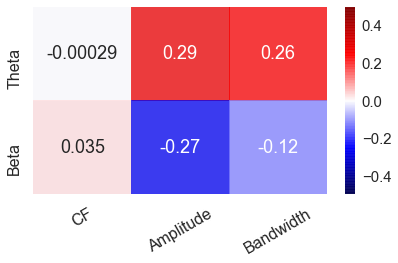

In [187]:
import seaborn as sns
sns.set_context('poster')
fig, ax = plt.subplots()


# We want to show all ticks...

# ... and label them with the respective list entries

ax.set_yticklabels(["theta", "beta"])

sns.set(font_scale=1.5)

sns.heatmap(heats, vmin=-.5,vmax=.5,annot=True, cmap= "seismic", xticklabels=["CF", "Amplitude", "Bandwidth"], yticklabels=["Theta","Beta"], alpha=.75)
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("../figures/spectral_features_corr_to_TBR.png", dpi=700)

## Avg peak params

In [26]:
#
fm_central.peak_params_

array([[ 6.7941109 ,  0.56018022,  1.00579109],
       [23.66296459,  0.36914888,  1.00857134]])

## Aperiodic stuff below

In [39]:
# Exponenent
all_age_parietal_tb_ratio = all_age_parietal[0][0]
all_age_parietal_apc = all_age_parietal[0][1]

all_age_central_tb_ratio = all_age_central[0][0]
all_age_central_apc = all_age_central[0][1]

all_age_frontal_tb_ratio = all_age_frontal[0][0]
all_age_frontal_apc = all_age_frontal[0][1]

# Peak Params
#fm_parietal = avg_fg(all_age_parietal_fg[0])
#fm_central = avg_fg(all_age_central_fg[0])
#fm_frontal = avg_fg(all_age_frontal_fg[0])

In [ ]:
all_age_parietal_pearson = pearsonr(all_age_parietal_apc, all_age_parietal_tb_ratio)
all_age_parietal_spearman = spearmanr(all_age_parietal_apc, all_age_parietal_tb_ratio)

all_age_central_pearson = pearsonr(all_age_central_apc, all_age_central_tb_ratio)
all_age_central_spearman = spearmanr(all_age_central_apc, all_age_central_tb_ratio)

all_age_frontal_pearson = pearsonr(all_age_frontal_apc, all_age_frontal_tb_ratio)
all_age_frontal_spearman = spearmanr(all_age_frontal_apc, all_age_frontal_tb_ratio)

print("All subjects parietal pearson: ", all_age_parietal_pearson)
print("All subjects parietal spearman: ", all_age_parietal_spearman)
print(" ")

print("All subjects central pearson: ", all_age_central_pearson)
print("All subjects central spearman: ", all_age_central_spearman)
print(" ")

print("All subjects frontal pearson: ", all_age_frontal_pearson)
print("All subjects frontal spearman: ", all_age_frontal_spearman)
print(" ")

## Predicting age from exponent

In [45]:
all_age_parietal_exp_age_p = pearsonr(all_age_parietal_apc, all_age_parietal[0][3])
all_age_parietal_exp_age_s = spearmanr(all_age_parietal_apc, all_age_parietal[0][3])

all_age_frontal_exp_age_p = pearsonr(all_age_frontal_apc, all_age_frontal[0][3])
all_age_frontal_exp_age_s = spearmanr(all_age_frontal_apc, all_age_frontal[0][3])

all_age_central_exp_age_p = pearsonr(all_age_central_apc, all_age_central[0][3])
all_age_central_exp_age_s = spearmanr(all_age_central_apc, all_age_central[0][3])

print("parietal exponent correlates to age (pearson): ", all_age_parietal_exp_age_p)
print("parietal exponent correlates to age (spearman): ", all_age_parietal_exp_age_s)
print()

print("frontal exponent correlates to age (pearson): ", all_age_frontal_exp_age_p)
print("frontal exponent correlates to age (spearman): ", all_age_frontal_exp_age_s)
print()

print("central exponent correlates to age (pearson): ", all_age_central_exp_age_p)
print("central exponent correlates to age (spearman): ", all_age_central_exp_age_s)

parietal exponent correlates to age (pearson):  (-0.6346683381968523, 4.876675414400836e-56)
parietal exponent correlates to age (spearman):  SpearmanrResult(correlation=-0.6872611745253143, pvalue=4.704989892502931e-69)

frontal exponent correlates to age (pearson):  (-0.5763808342149647, 2.7991407815194255e-44)
frontal exponent correlates to age (spearman):  SpearmanrResult(correlation=-0.6682322088698998, pvalue=4.8991535403989085e-64)

central exponent correlates to age (pearson):  (-0.5224239758370124, 2.5732584232546035e-35)
central exponent correlates to age (spearman):  SpearmanrResult(correlation=-0.6214873474536138, pvalue=3.6765509885372348e-53)


## Predicting Age from TBR

In [47]:
all_age_parietal_tbr_age_p = pearsonr(all_age_parietal_tb_ratio, all_age_parietal[0][3])
all_age_parietal_tbr_age_s = spearmanr(all_age_parietal_tb_ratio, all_age_parietal[0][3])

all_age_frontal_tbr_age_p = pearsonr(all_age_frontal_tb_ratio, all_age_frontal[0][3])
all_age_frontal_tbr_age_s = spearmanr(all_age_frontal_tb_ratio, all_age_frontal[0][3])

all_age_central_tbr_age_p = pearsonr(all_age_central_tb_ratio, all_age_central[0][3])
all_age_central_tbr_age_s = spearmanr(all_age_central_tb_ratio, all_age_central[0][3])

print("parietal exponent correlates to age (pearson): ", all_age_parietal_tbr_age_p)
print("parietal exponent correlates to age (spearman): ", all_age_parietal_tbr_age_s)
print()

print("frontal exponent correlates to age (pearson): ", all_age_frontal_tbr_age_p)
print("frontal exponent correlates to age (spearman): ", all_age_frontal_tbr_age_s)
print()

print("central exponent correlates to age (pearson): ", all_age_central_tbr_age_p)
print("central exponent correlates to age (spearman): ", all_age_central_tbr_age_s)

parietal exponent correlates to age (pearson):  (-0.4670253733105622, 1.206598334508968e-27)
parietal exponent correlates to age (spearman):  SpearmanrResult(correlation=-0.6367548776477613, pvalue=1.6586917847631905e-56)

frontal exponent correlates to age (pearson):  (-0.4465835155636714, 3.7701086519872125e-25)
frontal exponent correlates to age (spearman):  SpearmanrResult(correlation=-0.5833603215560321, pvalue=1.454751633682585e-45)

central exponent correlates to age (pearson):  (-0.48649966838431596, 3.4930650277180965e-30)
central exponent correlates to age (spearman):  SpearmanrResult(correlation=-0.6507169948479196, pvalue=9.782106424394115e-60)


## Young Age

This section calculates band ratios and the power exponent and determines the correlation between the two.

In [6]:
young = data[(data['Age'] >= 10) & (data['Age'] <= 13)]

#Extract ID's to open their corresponding files
young_IDs = young.ID.values

In [7]:
# FOOOF Settings
peak_width_limits = (1, 6) 

In [8]:
#Open Eyes closed data for all IDs
problem_files = []
missing_files = []
young_peaks = []
young_apcs = []
young_tb_ratios = []

for filename in young_IDs:
    try:
        # Construct FOOOFGroup model on psd
        curr = np.load('../dat/psds/'+ filename + '_ec_psds.npz')
        freqs = curr['arr_0']
        for ch in ch_inds:
            
            ps = curr['arr_1'][0][ch]
            fm = FOOOF(verbose=False)
            fm.add_data(freqs, ps)
            fm.fit()
            
            # Following ratio is only for one block
            curr_ratio = calc_band_ratio(freqs, ps, THETA_BAND, BETA_BAND)
            young_tb_ratios.append(curr_ratio)
            
            # Append params to respective array
            young_apcs.append(fm.aperiodic_params_[1])
            # young_peaks.append(fg.get_all_data('peak_params'))
        
    except FileNotFoundError:
        missing_files.append(filename)
    except ValueError:
        problem_files.append(filename)
    except LinAlgError:
        problem_files.append(filename)

In [9]:
fm.peak_params_

array([[ 9.84724795,  1.48219477,  3.00179298],
       [15.16285634,  0.34809455,  1.81360541],
       [17.44272081,  0.48291383,  0.5       ],
       [19.11775004,  0.35100811,  2.67710974]])

In [9]:
young_spear = spearmanr(young_apcs, young_tb_ratios)
young_pear = pearsonr(young_apcs, young_tb_ratios)

In [11]:
print("Spearman Avg: ", young_spear)
print("Pearson Avg: ", young_pear)

Spearman Avg:  SpearmanrResult(correlation=0.6078219752624691, pvalue=4.8339223862579e-18)
Pearson Avg:  (0.5613354755664276, 4.407109509583849e-15)


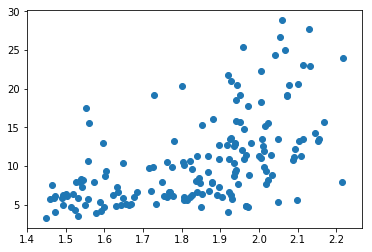

In [14]:
plt.scatter(young_apcs, young_tb_ratios)


## Old Age

In [15]:
old = data[(data['Age'] >= 25)]

#Extract ID's to open their corresponding files
old_IDs = old.ID.values

#Open Eyes closed data for all IDs
problem_files_old = []
missing_files_old = []
old_apcs = []
old_tb_ratios = []

for filename in old_IDs:
    try:
        curr = np.load('../dat/psds/'+ filename + '_ec_psds.npz')
        freqs = curr['arr_0']
        for ch in ch_inds:
            
            ps = curr['arr_1'][0][ch]
        
            fm = FOOOF(verbose=False)
            fm.add_data(freqs, ps)
            fm.fit()
        
            # Following ratio is only for one block
            curr_ratio = calc_band_ratio(curr['arr_0'], curr['arr_1'][0], THETA_BAND, BETA_BAND)
            old_tb_ratios.append(curr_ratio)
            old_apcs.append(fm.aperiodic_params_[1])
        
            #old_params.append(fm.peak_params_[])
        
    except FileNotFoundError:
        missing_files_old.append(filename)
    except ValueError:
        problem_files_old.append(filename)
    except LinAlgError:
        problem_files_old.append(filename)

In [16]:
old_spear = spearmanr(old_apcs, old_tb_ratios)
old_pear = pearsonr(old_apcs, old_tb_ratios)

In [17]:
print("Old Spearman Avg: ", old_spear)
print("Old Pearson Avg: ", old_pear)

Old Spearman Avg:  SpearmanrResult(correlation=0.6280383056320723, pvalue=2.855498854069624e-07)
Old Pearson Avg:  (0.7093579858038961, 1.3442347746480015e-09)


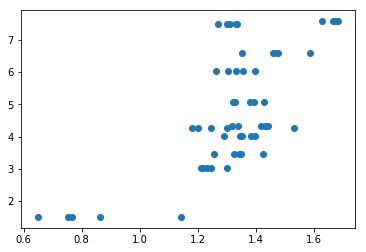

In [18]:
plt.scatter(old_apcs, old_tb_ratios, c=)


In [14]:
old_master = []
for i in range(0,7,2):
    bgs = old_params[i].tolist()
    gausses = old_params[i+1].tolist()
    
    bgs_df = pd.DataFrame({"Background" : bgs})
    gausses_df = pd.DataFrame({"Gaussians" : gausses})
    
    cur = [bgs_df, gausses_df]
    old_master.append(cur)

## Differences in BG params  

In [155]:
#young_master
y_bg_1 = 0
y_bg_2 = 0
count = 0

for i in young_master:
    y_bg_1 += i[0].values[0][0][0]
    y_bg_2 += i[0].values[0][0][1]
    count+=1
young_bg_1 = y_bg_1/(count+1)
young_bg_2 = y_bg_2/(count+1)

young_bg = [young_bg_1,young_bg_2]

In [156]:
o_bg_1 = 0
o_bg_2 = 0
count = 0

for i in old_master:
    o_bg_1 += i[0].values[0][0][0]
    o_bg_2 += i[0].values[0][0][1]
    count+=1
old_bg_1 = o_bg_1/(count+1)
old_bg_2 = o_bg_2/(count+1)

old_bg = [old_bg_1,old_bg_2]

In [164]:
print("background param 1 difference:",abs(old_bg[0] - young_bg[0]))
print("background param 2 difference:",abs(old_bg[1] - young_bg[1]))

background param 1 difference: 0.8852820763497281
background param 2 difference: 0.7435350192201011


## Differences in BandRatio Measures

In [20]:
diff_tb_ratio = np.abs(np.mean(young_tb_ratios) - np.mean(old_tb_ratios))
print("Average young Theta/Beta:", np.mean(young_tb_ratios))
print("Average old Theta/Beta:", np.mean(old_tb_ratios))
print("Difference in average Theta/Beta ratio", diff_tb_ratio)

Average young Theta/Beta: 8.189531639873604
Average old Theta/Beta: 4.1547301345251855
Difference in average Theta/Beta ratio 4.034801505348418
